In [1]:
import pandas as pd
from matplotlib import pyplot
from sqlalchemy import create_engine
import pandas as pd
import psycopg2
from configparser import ConfigParser

config_path=r'/home/jovyan/config/'

def config(filename, section):
    parser = ConfigParser()
    parser.read(filename)
    
    db = {}
    if parser.has_section(section):
        params = parser.items(section)
        for param in params:
            db[param[0]] = param[1]
    
    return db

def get_engine():
    param=config(filename=config_path+'database.ini', section='postgresql')
    db_uri='postgresql+psycopg2://'+param['user']+':'+param['password']+'@'+param['host']+'/'+param['database']
    engine=create_engine(db_uri)
    return engine

# Histogram of Review Ratings


In [2]:
df_hist_review_rating=pd.read_sql("select review_rating,count(*) review_cnt from curated.fact_product_reviews group by review_rating;",con=get_engine())
df_hist_review_rating

,review_rating,review_cnt
0,3.0,4057
1,2.0,2566
2,4.0,8989
3,1.0,2392
4,5.0,29246


<AxesSubplot:title={'center':'Review Ratings Histogram'}, xlabel='review_rating'>

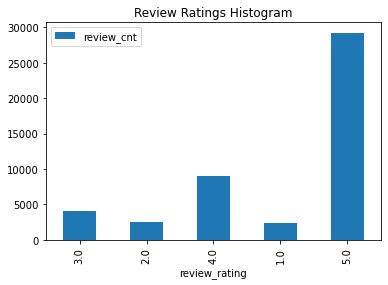

In [3]:
df_hist_review_rating.plot(kind='bar',x='review_rating',y='review_cnt',title='Review Ratings Histogram')

# Product counts per category and price_bucket

In [4]:
df_product_price_bucket=pd.read_sql("select price_bucket,count(*) product_cnt from curated.dim_product p left outer join curated.dim_price_bucket pb on p.price_bucket_id=pb.price_bucket_id group by price_bucket;",con=get_engine())

df_product_price_bucket

,price_bucket,product_cnt
0,[0-100)$,37358
1,[100-200)$,1030
2,[200-300)$,223
3,[300-400)$,13
4,[400-500)$,4
5,[500-600)$,9
6,[600-700)$,4
7,[800-900)$,1


In [5]:
df_product_category=pd.read_sql("select category,count(*) from curated.dim_product group by category order by 2 desc;",con=get_engine())

df_product_category

,category,count
0,Books,38594
1,Movies & TV,26
2,CDs & Vinyl,7
3,Sports & Outdoors,6
4,Musical Instruments,3
5,,3
6,"Clothing, Shoes & Jewelry",2
7,Toys & Games,1
